In [35]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [36]:
%store -r machine_data

In [37]:
X = machine_data.drop(columns='Health_status')

# Ensuring target is integer
y = machine_data['Health_status'].astype(int)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:


# Adding the  intercept and cast to float
X_train_const = add_constant(X_train).astype(float)
X_test_const  = add_constant(X_test) .astype(float)

# Fitting the logistic regression
logit_model = Logit(y_train, X_train_const).fit(disp=False)

# Summary of the logit model
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:          Health_status   No. Observations:                 3403
Model:                          Logit   Df Residuals:                     3369
Method:                           MLE   Df Model:                           33
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                  0.1746
Time:                        00:19:54   Log-Likelihood:                -1509.1
converged:                       True   LL-Null:                       -1828.3
Covariance Type:            nonrobust   LLR p-value:                3.119e-113
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.7998      0.324     -5.562      0.000      -2.434      -1.166
PA_mean              -0.4010      0.169     -2.378      0.017      -0.732      -0.071
PA_std                0.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
y_pred_prob = logit_model.predict(X_test_const)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")


AUC: 0.758


AUC: 0.758


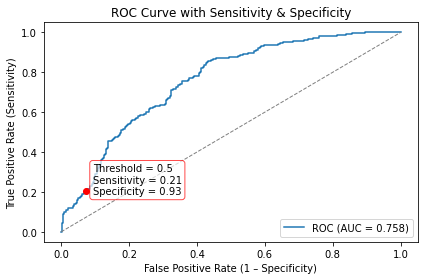

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.3f}")

# pick the threshold closest to 0.5 (you can choose another value)
th = 0.5
idx = np.argmin(np.abs(thresholds - th))
sens = tpr[idx]                    # sensitivity = TPR at that threshold
spec = 1 - fpr[idx]                # specificity = 1 - FPR

# plot ROC
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], "--", linewidth=1, color="gray")

# mark & annotate the chosen point
plt.scatter(fpr[idx], tpr[idx], color="red", zorder=5)
plt.text(
    fpr[idx] + 0.02, tpr[idx] - 0.02,
    f"Threshold = {th}\nSensitivity = {sens:.2f}\nSpecificity = {spec:.2f}",
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.7)
)

plt.xlabel("False Positive Rate (1 – Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve with Sensitivity & Specificity")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [44]:
from sklearn.metrics import f1_score, classification_report

# Generate binary predictions at your chosen threshold (e.g. 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")

# Full classification breakdown
print(classification_report(y_test, y_pred, digits=2))

F1-score: 0.28
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       657
           1       0.46      0.21      0.28       194

    accuracy                           0.76       851
   macro avg       0.63      0.57      0.57       851
weighted avg       0.72      0.76      0.73       851

